In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\kevin\Downloads\titanic_data.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical Value Analysis

<Axes: >

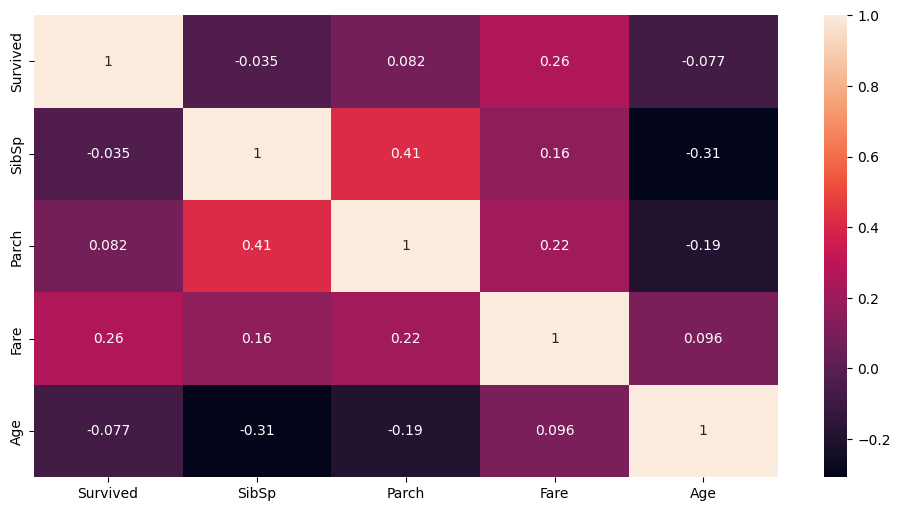

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(data[['Survived','SibSp','Parch','Fare','Age']].corr(),annot=True)

## SibSp Exploratory Analysis

In [8]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

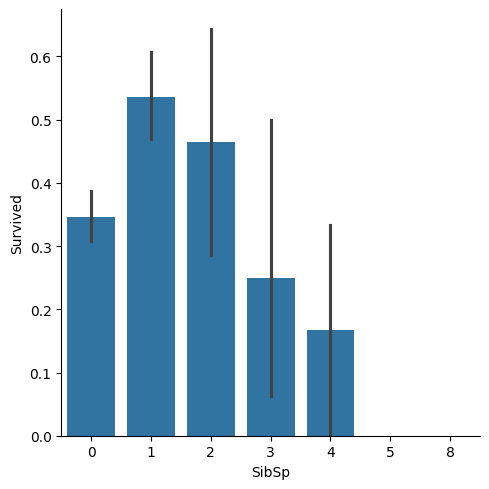

In [9]:
sns.catplot(x="SibSp",y="Survived",data=data,kind="bar")

## Age

C:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

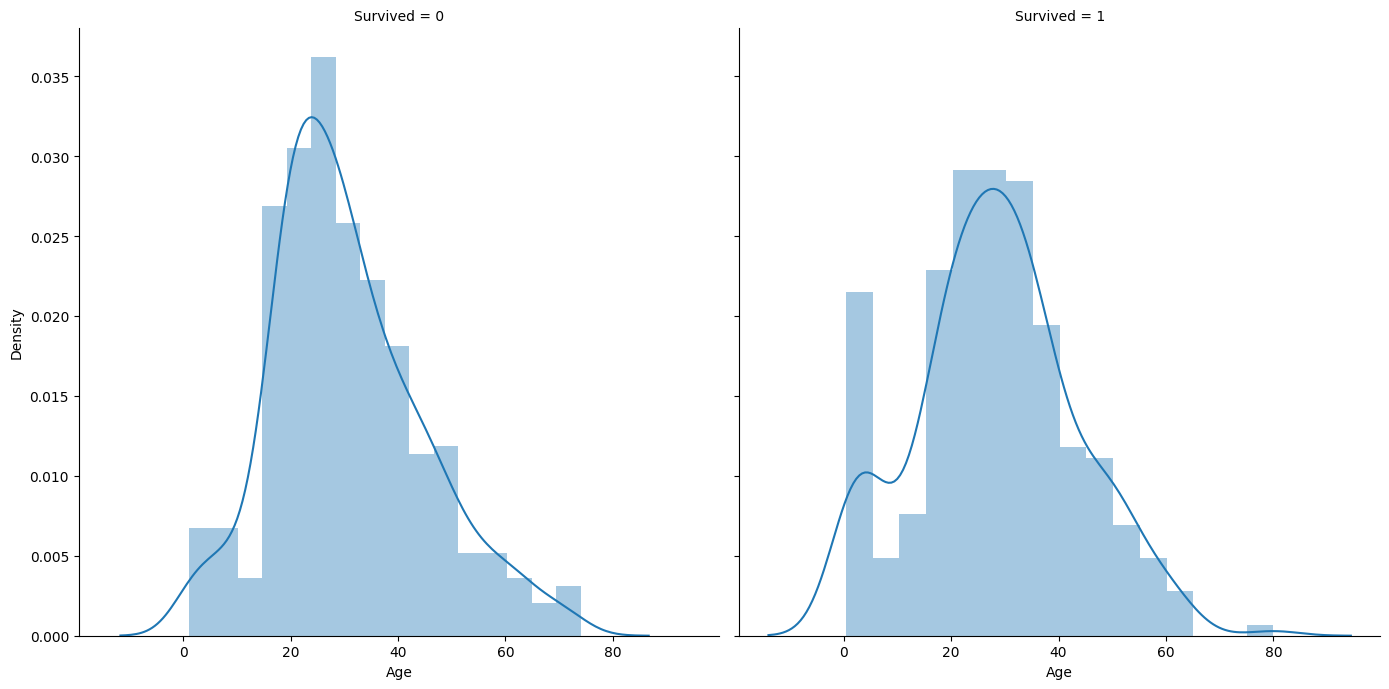

In [10]:
age_visual = sns.FacetGrid(data,col="Survived",height = 7)
age_visual = age_visual.map(sns.distplot,"Age")

## Sex

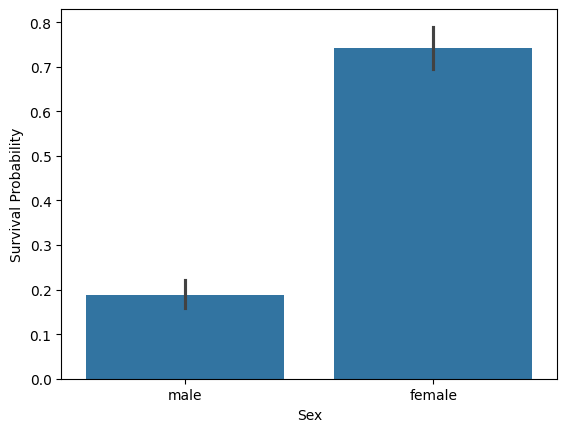

In [11]:
sex_plot = sns.barplot(x="Sex",y="Survived",data=data).set_ylabel("Survival Probability")

In [12]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## P-class

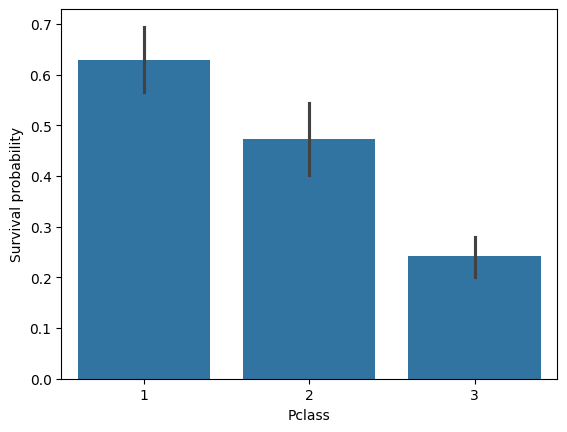

In [13]:
pclass_visual = sns.barplot(x="Pclass",y="Survived",data=data).set_ylabel("Survival probability")

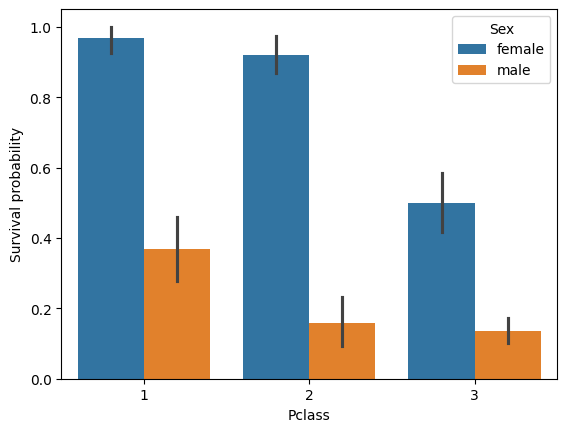

In [14]:
pclass_visual = sns.barplot(x="Pclass",y="Survived",data=data,hue="Sex").set_ylabel("Survival probability")

## Embarkment

In [15]:
data['Embarked'].isnull().sum()

2

In [16]:
data["Embarked"] = data['Embarked'].fillna('S')

In [17]:
data['Embarked'].isnull().sum()

0

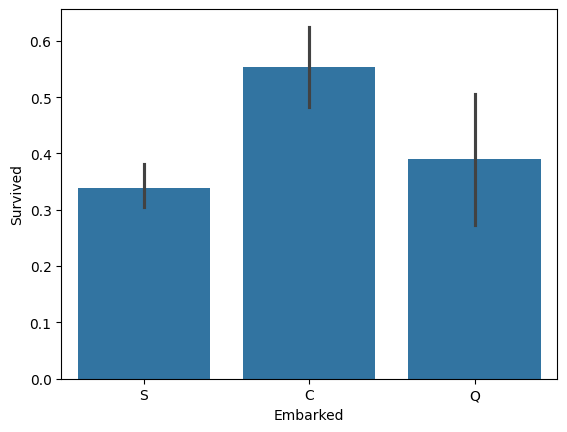

In [18]:
embarked_visual = sns.barplot(x="Embarked",y="Survived",data=data)

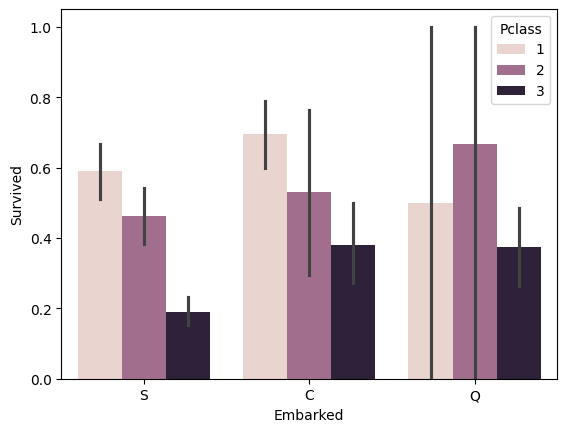

In [19]:
embarked_visual = sns.barplot(x="Embarked",y="Survived",data=data,hue="Pclass")

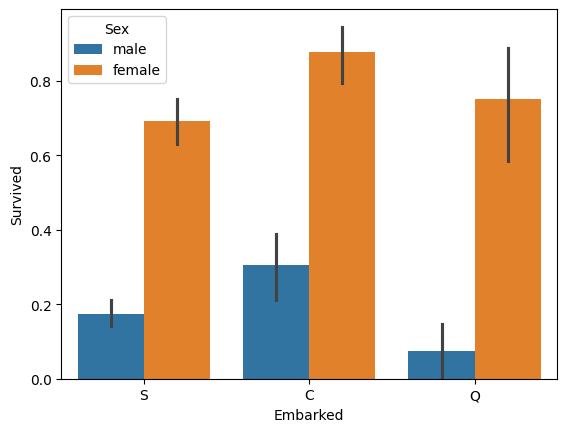

In [20]:
embarked_visual = sns.barplot(x="Embarked",y="Survived",data=data,hue="Sex")

## Preparing model

In [21]:
data = pd.read_csv(r"C:\Users\kevin\Downloads\titanic_data.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
mean = data['Age'].mean()
std = data['Age'].std()
is_null  = data["Age"].isnull().sum()

In [25]:
is_null

177

In [26]:
random_age = np.random.randint(mean-std,mean+std,size=is_null)
random_age

array([16, 22, 22, 36, 23, 27, 35, 32, 24, 32, 31, 41, 37, 26, 18, 31, 16,
       26, 23, 16, 30, 27, 16, 37, 33, 15, 27, 28, 30, 41, 25, 24, 29, 30,
       42, 19, 43, 41, 32, 25, 24, 22, 36, 39, 27, 33, 38, 17, 39, 30, 25,
       35, 40, 25, 32, 29, 20, 38, 25, 34, 34, 40, 34, 38, 24, 27, 30, 21,
       24, 27, 26, 24, 28, 26, 40, 36, 20, 37, 32, 18, 34, 40, 38, 28, 38,
       23, 30, 24, 33, 36, 31, 41, 19, 15, 19, 30, 29, 43, 28, 42, 25, 29,
       22, 33, 38, 22, 19, 32, 28, 41, 32, 31, 34, 27, 31, 21, 27, 25, 29,
       40, 25, 19, 17, 23, 42, 31, 22, 18, 17, 34, 34, 24, 23, 35, 28, 43,
       39, 42, 23, 27, 23, 41, 22, 21, 18, 43, 31, 19, 34, 31, 41, 20, 19,
       26, 20, 40, 29, 39, 38, 20, 40, 42, 21, 16, 29, 16, 34, 24, 15, 21,
       43, 16, 39, 15, 23, 39, 26])

In [27]:
a = data['Age'].copy()
a[np.isnan(a)] = random_age
data["Age"] = a

In [28]:
a

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    26.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [29]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
data['Embarked'] = data['Embarked'].fillna('S')

In [32]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [33]:
cols_to_drop = ['Cabin','PassengerId','Name','Ticket']
sub_x = data['PassengerId']
data.drop(cols_to_drop,axis=1,inplace=True)

In [34]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,26.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [35]:
gender = {"male":0,"female":1}

data['Sex'] = data['Sex'].map(gender)

In [36]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,26.0,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [37]:
embark_map = {"S":0,"C":1,"Q":2}
data['Embarked'] = data['Embarked'].map(embark_map)

In [38]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,26.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


## Splitting up the data

In [39]:
from sklearn.model_selection import train_test_split
x = data.drop('Survived',axis=1)
y = data['Survived']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [41]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
114,3,1,17.0,0,0,14.4583,1
874,2,1,28.0,1,0,24.0000,1
76,3,0,26.0,0,0,7.8958,0
876,3,0,20.0,0,0,9.8458,0
674,2,0,41.0,0,0,0.0000,0
...,...,...,...,...,...,...,...
715,3,0,19.0,0,0,7.6500,0
767,3,1,30.5,0,0,7.7500,2
72,2,0,21.0,0,0,73.5000,0
235,3,1,33.0,0,0,7.5500,0


## Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
scale_x_train = sc_x.fit_transform(x_train)
scale_x_test = sc_x.transform(x_test)

## Classification

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Initializing Models

In [44]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [45]:

rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [47]:

svc_classifier.fit(x_train,y_train)

SVC()

In [48]:
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:

knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

## Predicting the data

In [50]:
logreg_ypred = logreg.predict(x_test)
svc_ypred = svc_classifier.predict(x_test)
dt_ypred = dt_classifier.predict(x_test)
knn_ypred = knn_classifier.predict(x_test)
rf_ypred = rf_classifier.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
logreg_acc = accuracy_score(y_test,logreg_ypred)
logreg_acc

0.7798507462686567

In [53]:
svc_acc= accuracy_score(y_test,svc_ypred)
svc_acc

0.6529850746268657

In [54]:
dt_acc= accuracy_score(y_test,dt_ypred)
dt_acc

0.7276119402985075

In [55]:
knn_acc = accuracy_score(y_test,knn_ypred)
knn_acc

0.6865671641791045

In [56]:
rf_acc = accuracy_score(y_test,rf_ypred)
rf_acc

0.753731343283582

In [57]:
print("LogisticRegression :", round(logreg_acc*100,2))
print("Support Vector Machine :", round(svc_acc*100,2))
print("Decision Tree :", round(dt_acc*100,2))
print("RandomForest :", round(rf_acc*100,2))
print("KNearestNeighbor Classifier :", round(knn_acc*100,2))

LogisticRegression : 77.99
Support Vector Machine : 65.3
Decision Tree : 72.76
RandomForest : 75.37
KNearestNeighbor Classifier : 68.66
